Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


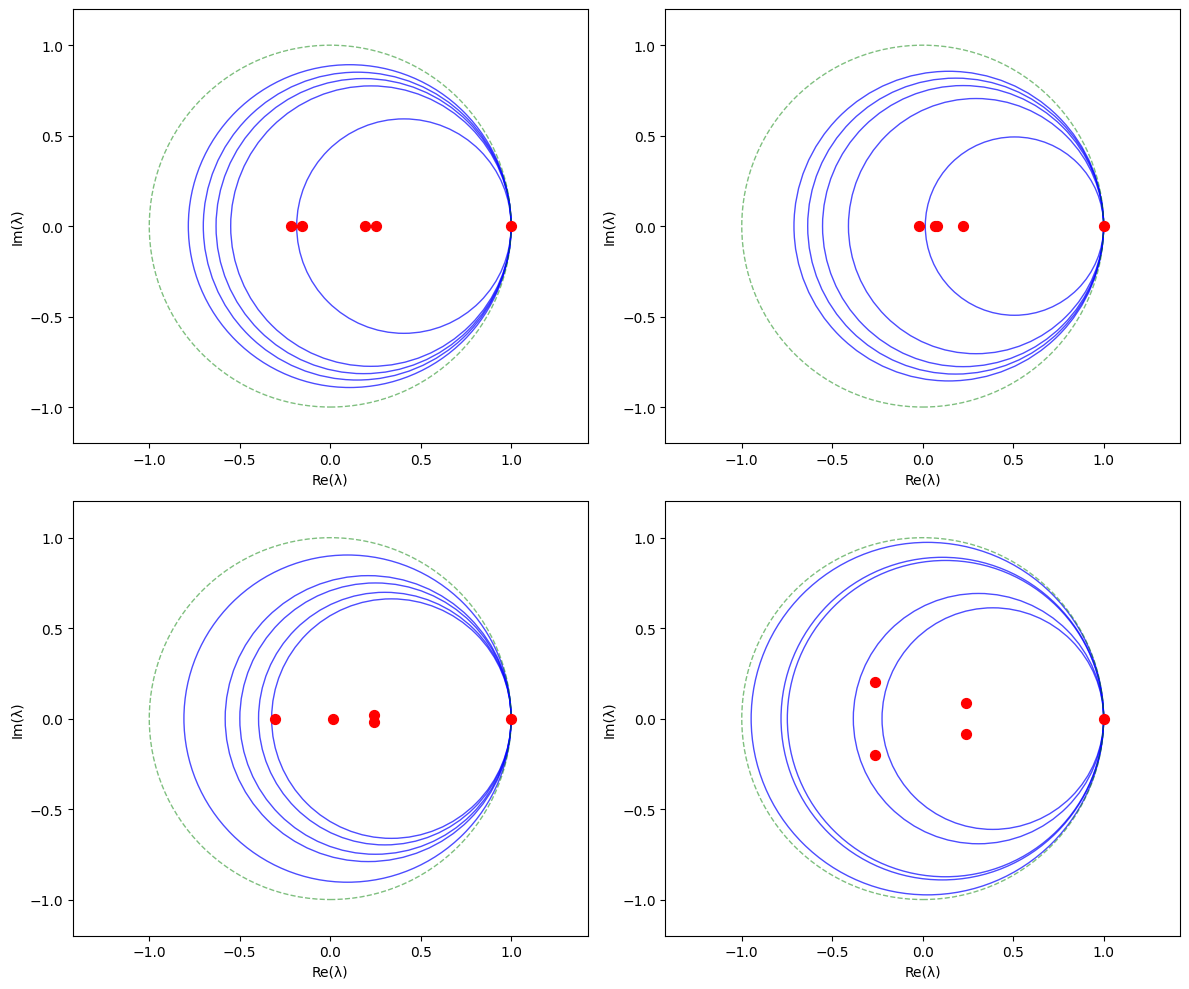

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_stochastic_matrix(n):
    a = np.random.rand(n, n)
    row_sums = a.sum(axis=1, keepdims=True)
    a = a / row_sums
    return a

def check_eigenvalue_property(a):
    eigenvalues = np.linalg.eigvals(a)
    has_eigenvalue_1 = np.any(np.abs(eigenvalues - 1) < 1e-10)
    all_eigenvalues_leq_1 = np.all(np.abs(eigenvalues) <= 1 + 1e-10)
    return eigenvalues, has_eigenvalue_1, all_eigenvalues_leq_1

def plot_gershgorin_and_eigenvalues(a, eigenvalues, ax):
    n = a.shape[0]
    xg = np.diag(a).real
    yg = np.diag(a).imag
    rg = np.zeros(n)
    for i in range(n):
        rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    for i in range(n):
        circle = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False, edgecolor='blue', alpha=0.7, linewidth=1)
        ax.add_patch(circle)
    ax.scatter(eigenvalues.real, eigenvalues.imag, color='red', s=50, label="Собственные значения", zorder=3)
    unit_circle = plt.Circle((0, 0), radius=1, fill=False, edgecolor='green', linestyle='--', alpha=0.5)
    ax.add_patch(unit_circle)
    ax.set_xlabel('Re(λ)')
    ax.set_ylabel('Im(λ)')
    ax.axis('equal')
    max_radius = max(1, np.max(rg), np.max(np.abs(eigenvalues)))
    ax.set_xlim(-max_radius-0.2, max_radius+0.2)
    ax.set_ylim(-max_radius-0.2, max_radius+0.2)

n = 5
num_matrices = 4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx in range(num_matrices):
    a = generate_stochastic_matrix(n)
    eigenvalues, has_eigenvalue_1, all_leq_1 = check_eigenvalue_property(a)
    plot_gershgorin_and_eigenvalues(a, eigenvalues, axes[idx])

plt.tight_layout()
plt.show()

In [7]:
n = 6
H = np.array([
    [0, 0, 0.5, 0, 0.5, 0],
    [1/3, 0, 0, 0, 0, 0.5],
    [1/3, 0.5, 0, 0, 0, 0],
    [1/3, 0, 0, 0, 0.5, 0.5],
    [0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0.5, 0.5, 0, 0]
])

α = 0.85
E = np.ones((n, n)) / n
G = α * H + (1 - α) * E

def power_method(G, max_iter=100, tol=1e-10):
    n = G.shape[0]
    v = np.ones(n) / n
    
    for iteration in range(max_iter):
        v_prev = v.copy()
        v = G @ v
        v = v / np.sum(v)
        
        if np.linalg.norm(v - v_prev, ord=1) < tol:
            break
    
    return v

pagerank = power_method(G)
print("PageRank вектор:", pagerank)
print("Сумма компонент:", np.sum(pagerank))

Gv = G @ pagerank
print("Проверка G*v ≈ v:", np.allclose(Gv, pagerank))
print("Максимальная разница:", np.max(np.abs(Gv - pagerank)))

PageRank вектор: [0.15621711 0.14290002 0.12999402 0.21886967 0.17875212 0.17326707]
Сумма компонент: 1.0
Проверка G*v ≈ v: True
Максимальная разница: 6.181527512083562e-12
